In [1]:
import json
import re
import sys
from pathlib import Path
from iohblade.loggers import ExperimentLogger
from llamea.ast_features import extract_ast_features
from iohblade.loggers import ExperimentLogger
from iohblade.plots import *
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json


In [ ]:
logger = ExperimentLogger('paper_results/MABBOB_guided_gemini', True)
log_data = logger.get_data()
log_data.head()

,method_name,problem_name,llm_name,method,problem,llm,solution,log_dir,seed
0,ES,MA_BBOB,gemini-2.0-flash-lite,"{'method_name': 'ES', 'budget': 100, 'kwargs':...","{'name': 'MA_BBOB', 'dims': [10], 'training_in...","{'model': 'gemini-2.0-flash-lite', 'code_patte...","{'id': 'c590d0b5-8119-4135-8864-1a55777b1f4b',...",run-ES-MA_BBOB-2,2
1,ES,MA_BBOB,gemini-2.0-flash-lite,"{'method_name': 'ES', 'budget': 100, 'kwargs':...","{'name': 'MA_BBOB', 'dims': [10], 'training_in...","{'model': 'gemini-2.0-flash-lite', 'code_patte...","{'id': 'a2d6f426-a046-4cab-8650-ae39575fd48b',...",run-ES-MA_BBOB-4,4
2,ES-guided,MA_BBOB,gemini-2.0-flash-lite,"{'method_name': 'ES-guided', 'budget': 100, 'k...","{'name': 'MA_BBOB', 'dims': [10], 'training_in...","{'model': 'gemini-2.0-flash-lite', 'code_patte...","{'id': 'adf6e0b7-3b8e-4ef8-b5f6-d32237fc1acb',...",run-ES-guided-MA_BBOB-3,3
3,ES,MA_BBOB,gemini-2.0-flash-lite,"{'method_name': 'ES', 'budget': 100, 'kwargs':...","{'name': 'MA_BBOB', 'dims': [10], 'training_in...","{'model': 'gemini-2.0-flash-lite', 'code_patte...","{'id': '61dfc9ae-8b37-4639-8f88-a7d16fa870d4',...",run-ES-MA_BBOB-3,3
4,ES-guided,MA_BBOB,gemini-2.0-flash-lite,"{'method_name': 'ES-guided', 'budget': 100, 'k...","{'name': 'MA_BBOB', 'dims': [10], 'training_in...","{'model': 'gemini-2.0-flash-lite', 'code_patte...","{'id': '86b4446f-c710-4752-90e8-2a816cddf022',...",run-ES-guided-MA_BBOB-1,1


In [3]:
methods, problems = logger.get_methods_problems()
print(methods)
print(problems)

['ES', 'MCTS_AHD', 'ES-guided', 'LHNS:vns']
['MA_BBOB']


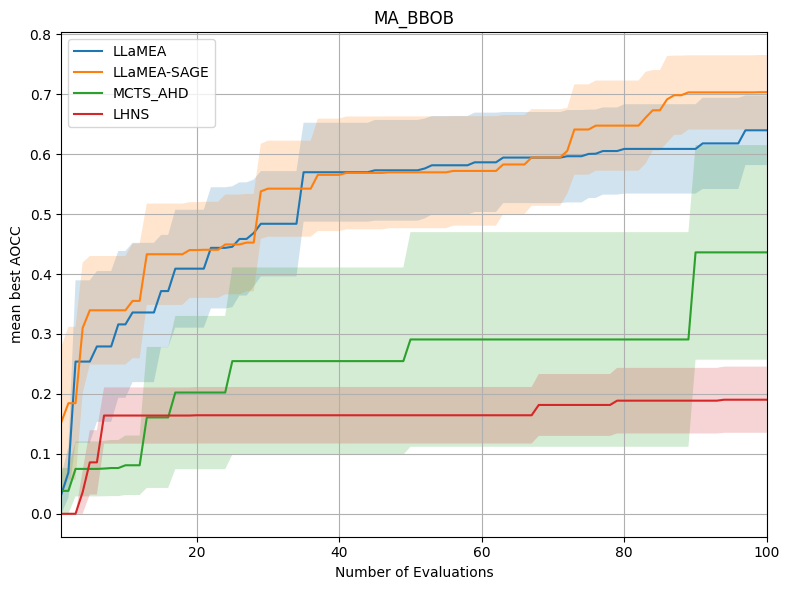

In [4]:
fig = plot_convergence(logger, metric="AOCC", methods=["ES", "ES-guided", "LHNS:vns","MCTS_AHD"], save=False, return_fig=True, budget=100, separate_lines=False, variance_aggregation="sem")
ax = fig.axes[0]   # or however you're getting your axis

handles, previous_labels = ax.get_legend_handles_labels()
new_labels = []
for label in previous_labels:
    if label == "ES":
        new_labels.append("LLaMEA")
    elif label == "ES-guided":
        new_labels.append("LLaMEA-SAGE")
    elif label == "LHNS:vns":
        new_labels.append("LHNS")
    else:
        new_labels.append(label)
ax.legend(handles=handles, labels=new_labels)
#ax.set_xscale('symlog')
#ax.set_yscale('symlog')
plt.savefig("MABBOB-aocc-gemini.png")
plt.show()